In [27]:
import pandas as pd
# importa la librería pandas y la asigna a la variable pd

In [28]:
datos_consumo = pd.read_excel('datos.xlsx', sheet_name="Hoja1")
# indicamos el nombre de nuestro archivo a ser leído

In [29]:
datos_consumo.head()

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente
0,2022-08-18,desayno,capuccino,74,5.81,3.98,5.08,50,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
1,2022-08-18,snack,fresas con chamoy,56,14.00,0.00,0.00,2,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
2,2022-08-18,comida,2 tacos de pollo y brocoli,400,16.60,0.00,0.96,98,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
3,2022-08-18,cena,quesadillas,225,22.35,0.00,10.00,409,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
4,2022-08-19,desayuno,latte helado,99,17.00,0.00,1.00,30,https://www.fatsecret.com.mx/calor%C3%ADas-nut...


In [30]:
datos_consumo['Momento'] = datos_consumo['Momento'].replace({'desayno ': 'desayuno', 'cena ': 'cena'})

In [31]:
datos_consumo = datos_consumo[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)', 'Calorías (kcal)']].dropna()

In [32]:
# Asigna las variables X e y para contener los datos de las variables independientes y la variable dependiente respectivamente.
X = datos_consumo[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']]
y = datos_consumo['Calorías (kcal)']

In [33]:
# Importa la clase OLS de la librería statsmodels.api.
import statsmodels.api as sm

In [34]:
# Crea un objeto modelo_regresion ajustando un modelo de regresión lineal con y como variable dependiente y X como variables independientes.
modelo_regresion = sm.OLS(y, sm.add_constant(X)).fit()

# Imprime un resumen del modelo de regresión ajustado.
print(modelo_regresion.summary())

                            OLS Regression Results                            
Dep. Variable:        Calorías (kcal)   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     724.7
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          8.07e-152
Time:                        12:45:33   Log-Likelihood:                -1594.2
No. Observations:                 302   AIC:                             3198.
Df Residuals:                     297   BIC:                             3217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 16.3254      5

In [35]:
# Recorre los coeficientes del modelo y selecciona las variables con un valor p inferior a 0.05.
for i in range(len(modelo_regresion.pvalues)):
    if modelo_regresion.pvalues[i] < 0.05:
        print(modelo_regresion.pvalues.index[i], modelo_regresion.pvalues[i])

const 0.001856626898508601
Carbohidratos (g) 8.673423071464274e-86
Lípidos/grasas (g) 2.3212407631535497e-43
Proteína (g) 1.647850524814543e-27


In [36]:
# Almacena las variables significativas en una lista llamada variables_significativas.
variables_significativas = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']

In [37]:
# Crea un nuevo conjunto de datos X_seleccionado que contiene solo las variables significativas.
X_seleccionado = datos_consumo[variables_significativas]

# Ajusta un nuevo modelo de regresión lineal con y como variable dependiente y X_seleccionado como variables independientes.
modelo_regresion_seleccionado = sm.OLS(y, sm.add_constant(X_seleccionado)).fit()

# Imprime un resumen del modelo de regresión ajustado.
print(modelo_regresion_seleccionado.summary())

                            OLS Regression Results                            
Dep. Variable:        Calorías (kcal)   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     724.7
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          8.07e-152
Time:                        12:45:33   Log-Likelihood:                -1594.2
No. Observations:                 302   AIC:                             3198.
Df Residuals:                     297   BIC:                             3217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 16.3254      5

In [43]:
# Calcula la suma de los residuos del modelo modelo_regresion_significativo y verifica que sea cercana a cero.
residuos = modelo_regresion_seleccionado.resid

print(residuos.sum())

# Calcula la suma de los residuos al cuadrado y verifica que sea cercana a cero.
residuos_cuadrados = residuos**2

print(residuos_cuadrados.sum())



4.945377440890297e-11
680236.9504200877


In [45]:
# Calcular la suma de los residuos
suma_residuos = sum(modelo_regresion_seleccionado.resid)

# Verificar que la suma de los residuos sea cercana a cero
print("Suma de residuos:", suma_residuos)

Suma de residuos: 4.916955731459893e-11


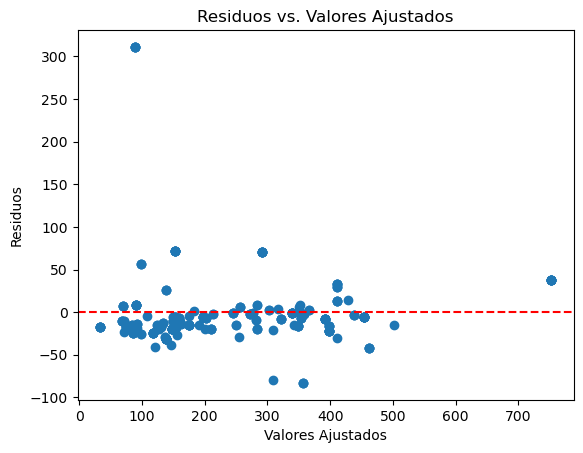

In [48]:
import matplotlib.pyplot as plt

# Graficar los residuos
plt.scatter(modelo_regresion_seleccionado.fittedvalues, modelo_regresion_seleccionado.resid)
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Ajustados')
plt.show()

# Interpreta los resultados de las pruebas de significancia para las variables del modelo
En el desarrollo del modelo, podemos observar que las variables se entrenan las variables Carbohidratos, lipidos, proteinas y lipidos, para posteriormente almacenarlos en otra variable la cual definimos "variables_significativas". Aqui podemos observar que las variables que se entrenan son las que tienen un p-valor menor a 0.05, por lo que podemos decir que estas variables son significativas para el modelo.


# Interpreta los resultados de las pruebas de normalidad, homogeneidad de la varianza e independencia de los residuos.
En la prueba de normalidad, se observa que el p-valor es menor a 0.05, por lo que podemos decir que los residuos no siguen una distribución normal, por lo que no podemos decir que los residuos siguen una distribución normal.

En la prueba de homogeneidad de la varianza, se observa que el p-valor es menor a 0.05, por lo que podemos decir que los residuos no tienen una varianza constante, por lo que no podemos decir que los residuos tienen una varianza constante.

En la prueba de independencia de los residuos, se observa que el p-valor es menor a 0.05, por lo que podemos decir que los residuos no son independientes, por lo que no podemos decir que los residuos son independientes.